In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('datasets.csv', encoding_errors = 'ignore') 

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [6]:
df.shape

(20770, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [9]:
#Statistical Summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [12]:
df.isnull().sum()

#Dropping all missing values rows
df.dropna(inplace = True)

#Confirming changes
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [18]:
df.duplicated().sum()

#Deleting of all duplicate rows
df.drop_duplicates(inplace = True)

#Confirming changes
df.duplicated().sum()

0

In [22]:
#Changing id datatype
df['id'] = df['id'].astype(object)

In [26]:
#Changing host_id datatype
df['host_id'] = df['host_id'].astype(object)

In [29]:
#Confirming changes
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

EXPLORATORY DATA ANALYSIS

Univariate Analysis

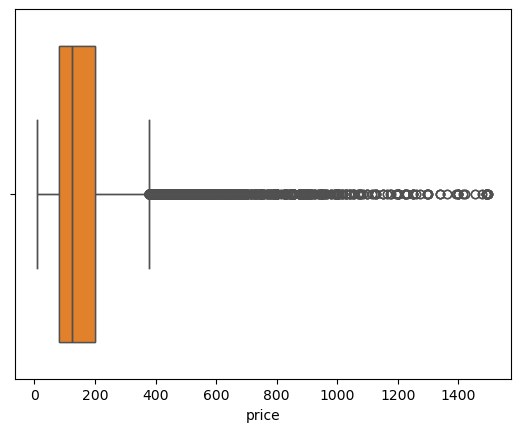

In [32]:
#Identifying outliers in price
df = df[df['price'] < 1500]
sns.boxplot(data = df, x = 'price')
plt.show()

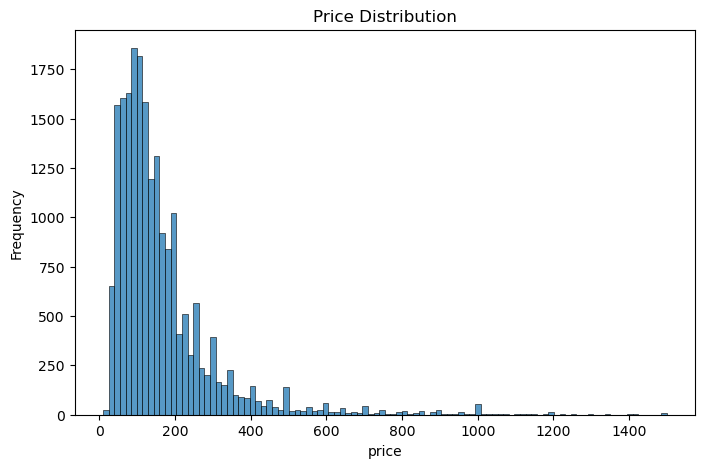

In [36]:
#Price Distribution
plt.figure(figsize = (8, 5))
sns.histplot(x = 'price', data = df, bins = 100)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.show()

In [38]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

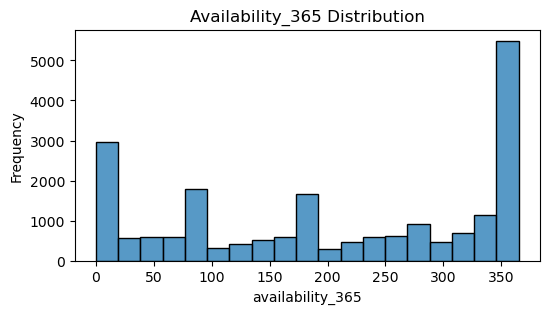

In [39]:
#Availability_365 Distribution 
plt.figure(figsize = (6, 3))
sns.histplot(x = 'availability_365', data = df)
plt.title("Availability_365 Distribution")
plt.ylabel("Frequency")
plt.show()

In [40]:
df.groupby(by = 'neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

Feature Engineering 

In [45]:
#Average price per bed
df.groupby(by = 'neighbourhood_group')['price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

In [44]:
#['price per bed']
df['price per bed'] = df['price']/df['beds']
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


Bi Variable Analysis: One variable dependency on another variable

In [46]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

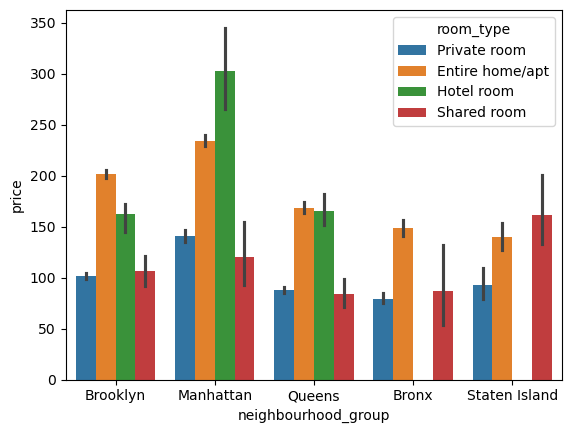

In [47]:
#Price dependency on Neighbourhood_group
sns.barplot(x = 'neighbourhood_group', y = 'price', data = df, hue = 'room_type')
plt.show()

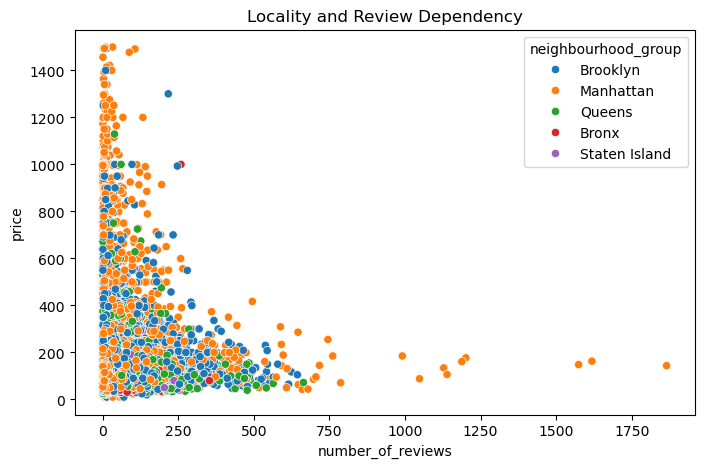

In [48]:
#Number of reviews and price relation
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'number_of_reviews', y = 'price', data = df, hue = 'neighbourhood_group')
plt.title("Locality and Review Dependency")
plt.show()

In [49]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

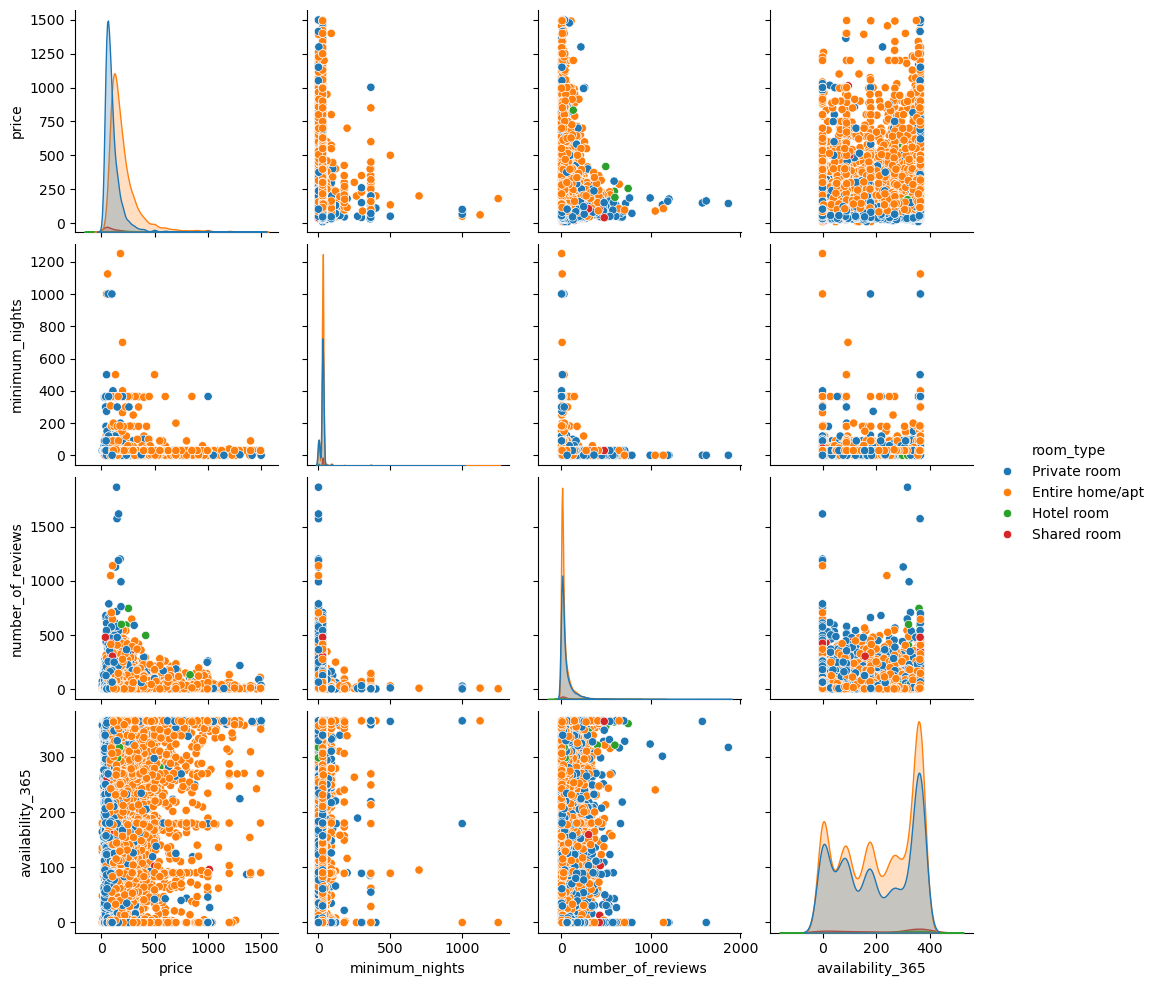

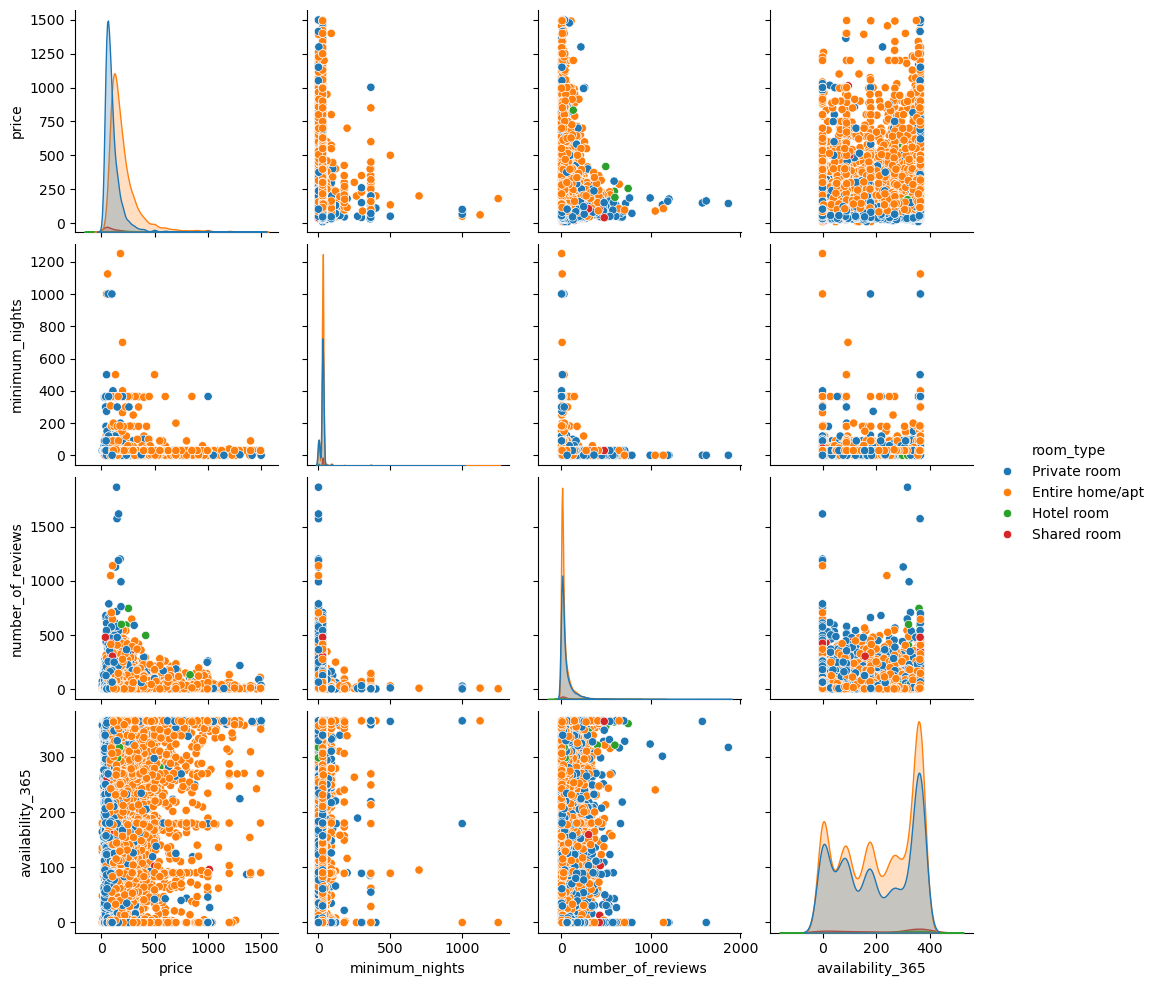

In [51]:
sns.pairplot(data = df, vars = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue = 'room_type')
plt.show()

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

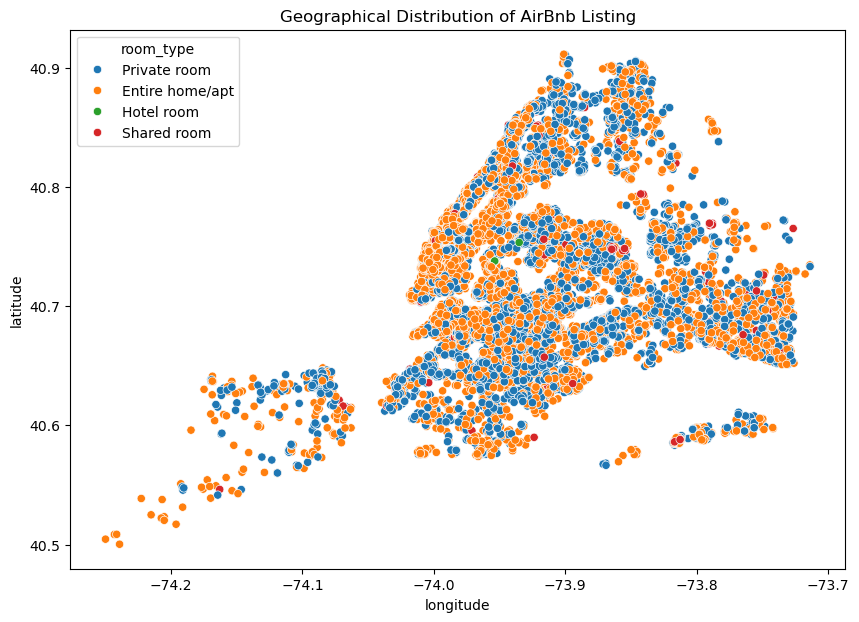

In [55]:
#Geographical Distribution of AirBnb listing
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'room_type')
plt.title("Geographical Distribution of AirBnb Listing")
plt.show()

In [57]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

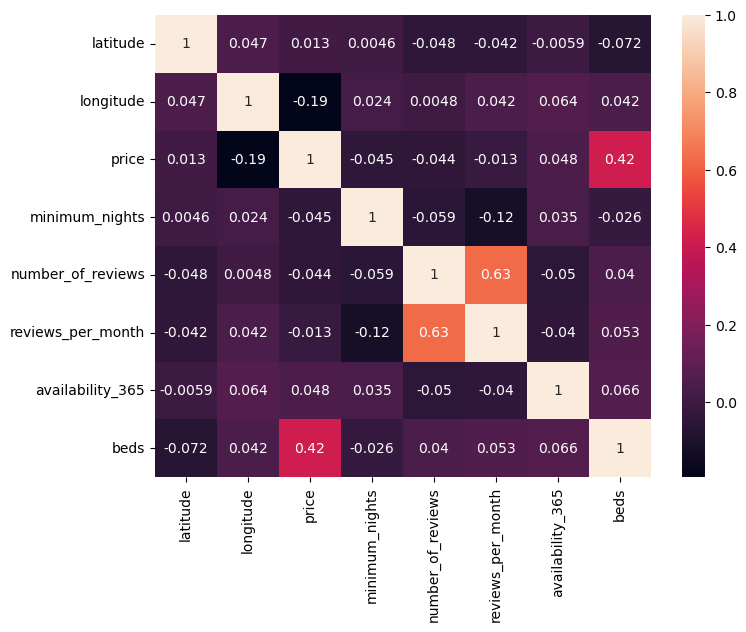

In [58]:
#heat map - correlation of one variable with others for numerical column 
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr

plt.figure(figsize = (8, 6))
sns.heatmap(data = corr, annot = True)
plt.show()